In [1]:
import os
import sys
AbsPath = os.path.abspath("")
STEEL_Path = AbsPath+"/../.."
sys.path.append(AbsPath+"/../..")
import numpy as np
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20

plt.rcParams['font.size']=15

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
Data = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE.npy")
Data_M = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_M.npy")
Data_SFR = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_SFR.npy")
Data_z = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_Z.npy")

GalaxyMassTrack10 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks9.9.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10[0], 0, 5).mask
GalaxyMass10 = np.log10(GalaxyMassTrack10[1][Mask])
Galaxy10SFR = np.log10(GalaxyMassTrack10[2] + GalaxyMassTrack10[3])[Mask]

GalaxyMassTrack11 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11[0], 0, 5).mask
GalaxyMass11 = np.log10(GalaxyMassTrack11[1][Mask])
Galaxy11SFR = np.log10(GalaxyMassTrack11[2] + GalaxyMassTrack11[3])[Mask]

GalaxyMassTrack11p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.5.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11p5[0], 0, 5).mask
GalaxyMass11p5 = np.log10(GalaxyMassTrack11p5[1][Mask])
Galaxy11p5SFR = np.log10(GalaxyMassTrack11p5[2] + GalaxyMassTrack11p5[3])[Mask]

GalaxyMassTrack12 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks12.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack12[0], 0, 5).mask
GalaxyMass12 = np.log10(GalaxyMassTrack12[1][Mask])
Galaxy12SFR = np.log10(GalaxyMassTrack12[2] + GalaxyMassTrack12[3])[Mask]


In [4]:
#Fetching the Leja Prospector SFR
Lpt5=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z0.5.dat", skiprows = 1)
L1=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z1.dat", skiprows = 1)
L2=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z2.dat", skiprows = 1)


def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.34*z - 0.079*(z**2))
    Norm = 0.69 + 0.71*z - 0.087*(z**2)
    Alpha = 1.0 - 0.022*z + 0.008*(z**2)
    Beta = 1.8 - 0.7*z + 0.035*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [20]:
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.34*z - 0.079*(z**2))
    Norm = 0.69 + 0.71*z - 0.087*(z**2)
    Alpha = 1.0 - 0.022*z + 0.008*(z**2)
    Beta = 1.8 - 0.7*z + 0.035*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [5]:
import emcee

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


10.68321 0.7601299999999999 0.99788 1.73035
-0.013672507615325265
10.823575929624988 0.7588824057611336 0.940375192651838 1.2490537737612897
-0.15614059598301772


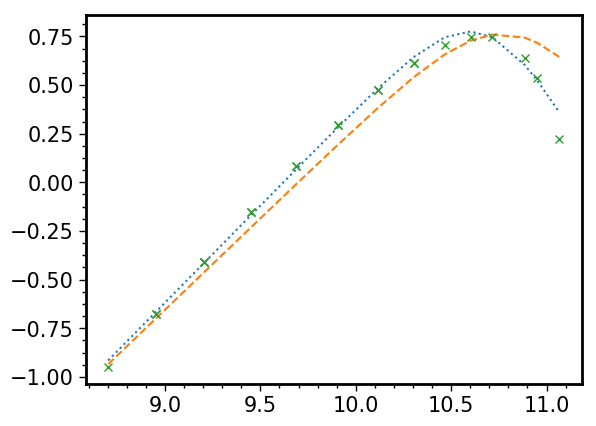

In [41]:
Redshift = 0.1
Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))
Mean_SFR[Mean_SFR<-1.5] = np.nan
Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
MaskNan = np.ma.masked_invalid(Mean_SFR).mask

AppMask = Mask0*~MaskNan

z = Redshift


M_n, Norm, Alpha, Beta =  10.65 + 0.34*z - 0.079*(z**2), 0.69 + 0.71*z - 0.087*(z**2), 1.0 - 0.022*z + 0.008*(z**2), 1.8 - 0.7*z + 0.035*(z**2)
print(M_n, Norm, Alpha, Beta)
plt.plot(Mean_M[AppMask],DPL_for_Fit(Mean_M[AppMask], M_n, Norm, Alpha, Beta), ":")
print(lnlike((M_n, Norm, Alpha, Beta), Mean_M[AppMask], Mean_SFR[AppMask]))


M_n, Norm, Alpha, Beta = 10.823575929624988 , 0.7588824057611336 , 0.940375192651838 , 1.2490537737612897
print(M_n, Norm, Alpha, Beta)
plt.plot(Mean_M[AppMask],DPL_for_Fit(Mean_M[AppMask], M_n, Norm, Alpha, Beta), "--")
print(lnlike((M_n, Norm, Alpha, Beta), Mean_M[AppMask], Mean_SFR[AppMask]))

plt.plot(Mean_M[AppMask],Mean_SFR[AppMask], "x")

plt.show()

In [13]:
def DPL_for_Fit(Mass, M_n, Norm, Alpha, Beta):
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**Mass, 10**M_n), -Alpha) + np.power(np.divide(10**Mass, 10**M_n), Beta), -1)
    return np.log10(MperY)

def lnprior(theta):
    M_n, Norm, Alpha, Beta = theta
    if (9<M_n<12) and (0.0<Norm<5) and (0<Alpha<2.0) and (0.0<Beta<3):
        return 0.0
    else:
        return -np.inf
def lnprob(theta, Mass, SFR):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return  lnlike(theta, Mass, SFR)
    
def lnlike(theta, Mass, SFR):
    M_n, Norm, Alpha, Beta = theta
    Fit = DPL_for_Fit(Mass, M_n, Norm, Alpha, Beta)
    if np.isnan(Fit).any():
        return -np.inf
    else:
        return -0.5*np.sum(np.power(Fit - SFR, 2)) 

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


z =  0.1
10.823575929624988 , 0.7588824057611336 , 0.940375192651838 , 1.2490537737612897


z =  0.5
10.90023604954229 , 0.9569609380524701 , 0.943829052649384 , 1.1630373847592388


z =  1
11.116712062077394 , 1.3952195933721427 , 0.9749710348123206 , 1.1449511410704372


z =  2
11.251239994725148 , 1.9322325583285704 , 1.0077920652432264 , 1.0594519166416014


z =  3
11.308708583195823 , 2.275030484458571 , 1.0037953312392043 , 1.0772643267091704


z =  5
10.374968287693793 , 2.0650196518092123 , 1.0899738020418455 , -0.8250056900822826




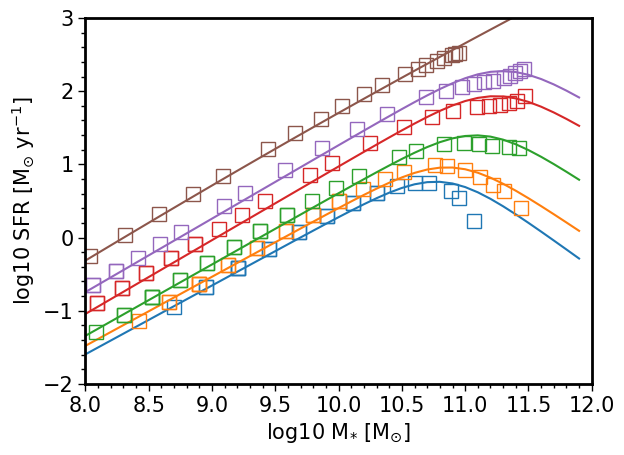

In [40]:
for Redshift in [0.1,0.5, 1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))
    Mean_SFR[Mean_SFR<-1.5] = np.nan
    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    MaskNan = np.ma.masked_invalid(Mean_SFR).mask
    AppMask = Mask0*~MaskNan
    
    z = Redshift
    ndim, nwalkers = 4, 40
    pos = [[10.65 + 0.34*z - 0.079*(z**2), 0.69 + 0.71*z - 0.087*(z**2), 1.0 - 0.022*z + 0.008*(z**2), 1.8 - 0.7*z + 0.035*(z**2)] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(Mean_M[AppMask], Mean_SFR[AppMask]), threads = 20)
    sampler.run_mcmc(pos, 2000)
    samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
    M_n, Norm, Alpha, Beta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),zip(*np.percentile(samples, [16, 50, 84],axis=0)))
    print("z = ", Redshift)
    print(M_n[0],",", Norm[0],",", Alpha[0],",", Beta[0])
    print("\n")
    Leg1.append(\
                plt.plot(Mean_M[Mask0], Mean_SFR[Mask0],\
                "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none", markersize=10)[0]\
               )
    plt.plot(M, DPL_for_Fit(np.arange(7, 12, 0.1), M_n[0], Norm[0], Alpha[0], Beta[0]), "-", color = colour)

    
plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
plt.ylim(-2, 3)
plt.tight_layout()
plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10


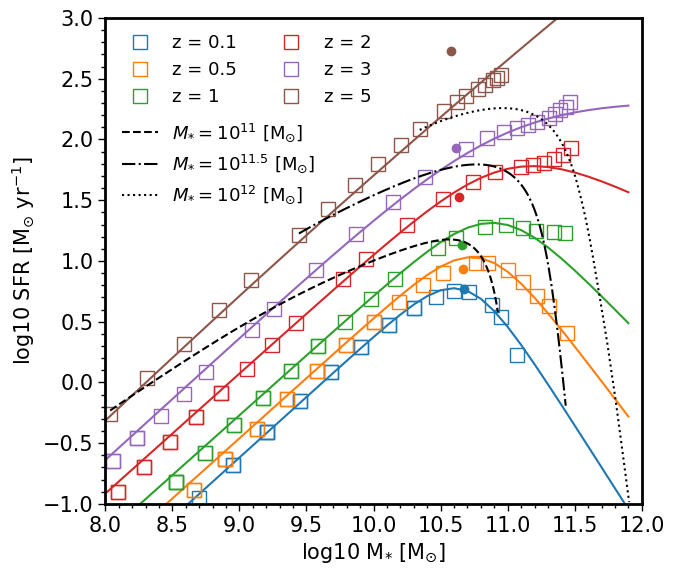

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in log10


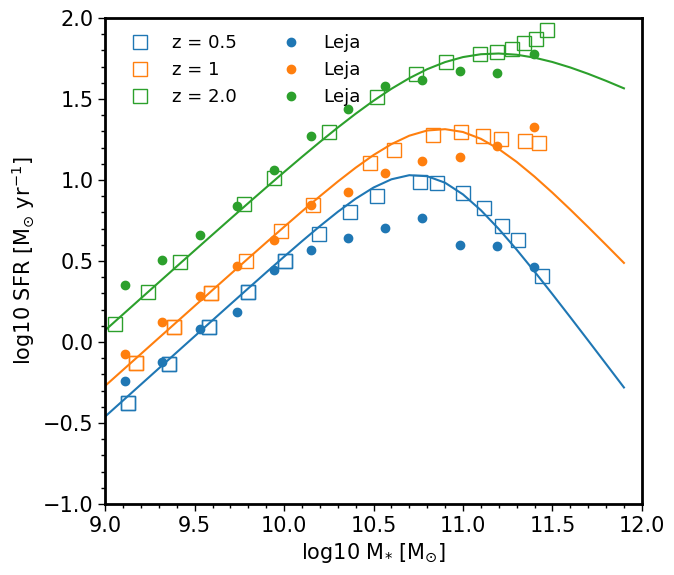

In [22]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [7,6])

"""
for Redshift in [0.5, 1, 2.0]:#[0.1,0.5, 1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none")
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
    #plt.plot(M, S15(M, Redshift), "--", color = colour)
    #plt.plot(M, T16(M, Redshift), "-.", color = colour)
#plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")
"""
Leg1 = []
Leg2 = []
for Redshift in [0.1,0.5, 1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    """z = Redshift
    M_n = 10.65 - 0.1*z #- 0.05*(z**2)
    Norm = 0.69 + 0.5*z - 0.05*(z**2)"""
    z_fac = (Redshift-0.1/1+Redshift)
    M_n = 10.675 - 0.01*z_fac
    Norm = 0.75 + 0.2*z_fac
    plt.plot(M_n, Norm, "o", color = colour)
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))

    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    Leg1.append(\
                plt.plot(Mean_M[Mask0], Mean_SFR[Mask0],\
                "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none", markersize=10)[0]\
               )
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
    

Leg2.append(plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")[0])
Leg2.append(plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")[0])
Leg2.append(plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")[0])


plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
plt.ylim(-1, 3)
plt.tight_layout()


first_legend = plt.legend(handles=Leg2, loc=6, frameon = False, ncol = 1, fontsize = 13, bbox_to_anchor = (0,0.7))
ax = plt.gca().add_artist(first_legend)
plt.legend(handles = Leg1, frameon = False, ncol = 2, loc = 2, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.pdf")
plt.show()

colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
plt.figure(figsize = [7,6])
for Redshift in [0.5, 1, 2.0]:
    colour = next(colourcycler)
    
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))

    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    plt.plot(Mean_M[Mask0], Mean_SFR[Mask0], "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none", markersize=10)
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
#plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

#Leja
plt.plot(Lpt5[:,0], np.log10(Lpt5[:,1]), "o",label = "Leja")
plt.plot(L1[:,0], np.log10(L1[:,1]), "o",label = "Leja")
plt.plot(L2[:,0], np.log10(L2[:,1]), "o",label = "Leja")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(9, 12)
plt.ylim(-1, 2)
plt.tight_layout()
plt.legend(frameon = False, ncol = 2, loc = 2, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.pdf")
plt.show()

In [ ]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask])-np.log10(Data[0][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift)-M, "-", color = colour)
    #plt.plot(M, S15(M, Redshift)-M, "--", color = colour)
    #plt.plot(M, T16(M, Redshift)-M, "-.", color = colour)
plt.plot(GalaxyMass11, Galaxy11SFR - GalaxyMass11, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR - GalaxyMass11p5, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass12, Galaxy12SFR - GalaxyMass12, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
#plt.ylim(-2, 3)
plt.tight_layout()
plt.legend(frameon = False, ncol = 3, loc = 3, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.pdf")
plt.show()

In [ ]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 10, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[3][Mask]+Data[1][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[3][Mask]), "s", label = "z = {}".format(Redshift), color = colour, fillstyle = 'none')
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "^", label = "z = {}".format(Redshift), color = colour, fillstyle = 'none')
    
plt.ylabel("log10 $\mathrm{\dot{M}} $ [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
#plt.legend(frameon = False)
plt.show()